In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
#훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

#훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1,1)
test_input  = test_input.reshape(-1,1)

In [ ]:
#k-최근접 이웃 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#모델 테스트
#실제 값보다 더 적은 수가 나옴
print(knr.predict([[50]]))

[1033.33333333]


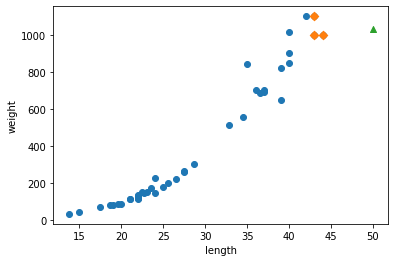

In [ ]:
import matplotlib.pyplot as plt
#길이가 50cm인 농어의 최근접 이웃 3마리의 정보를 저장
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()




---



*   길이가 50cm인 농어는 삼각형으로 표시됨
*   길이가 50cm인 농어의 최근접 이웃 샘플은 길이가 45인 농어의
데이터까지만 있었기 때문에 벌어진 오류임
*   데이터가 방대했다면 회귀 모델이 원래 몸무게와 근접하게 측정했을 것임
*   또한, 45 이상의 농어의 무게를 측정하려하면 똑같이 1033.33..g으로 예측할 것임

---






In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


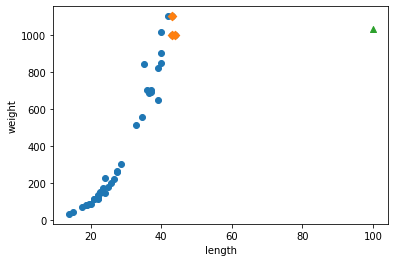

In [ ]:
#길이가 100cm인 농어의 무게를 예측해봄
distances, indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#100cm 농어 데이터
plt.scatter(100,1033, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#그리고 100cm 길이의 농어의 예측한 무게를 출력해 봄
print(knr.predict([[100]]))
#직접 최근접 이웃의 평균을 내 봄
print(np.mean(train_target[indexes]))

[1033.33333333]
1033.3333333333333




---



---



In [ ]:
#sklearn의 선형 회귀(linear regression)을 이용하여 45cm이상의 농어의 무게 예측
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대해 예측함
print(lr.predict([[50]]))

[1241.83860323]




---



# 선형 회귀 모델
*   데이터의 x, y값을 토대로 y = ax + b일 때, 데이터에 들어맞는 a, b의 값을
찾아주는 알고리즘이다.
*  a(기울기, 계수, 가중치)는 lr.coef_에, b(y절편)은 lr.intercept_에 저장돼 있다.

---





In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


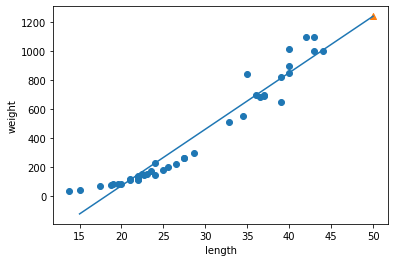

In [ ]:
#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방적식 그래프를 그림
# (x,y) 순서쌍으로 입력해야 함
plt.plot([15,50],[15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()




---



*   위의 직선이 선형 회귀 알고리즘이 농어 데이터셋에서 찾은 최적의 직선이다.
*   길이가 50cm인 농어에 대한 예측은 이 직선의 연장선위에 놓여있다.
*   이를 토대로 데이터 범위를 벗어난 샘플의 무게도 측정할 수 있게 되었다.

---





In [ ]:
#아재 과대·과소적합인지 알아봄
print(lr.score(train_input,train_target))
print(lr.score(test_input, test_target))
# 선형 회귀 모델이 훈련 세트에 과대적합 되었음
# 전체적으로 점수가 낮아 과소적합이라고도 볼 수 있음
# 그래프를 살펴본 결과, 위의 데이터셋에는 이차곡선이 좀 더 잘 어울이는 예측값임
# 그러기 위해서는 ax^2 + bx + c 형태로, x에 해당하는 길이를 제곱한 항이
# 훈련 데이터에 포함 되어야 함

0.939846333997604
0.8247503123313558


In [ ]:
#배열을 붙여주는 column_stack()함수를 이용하여 train_input을 제곱한 것을 train_input에 덧붙임 단, 튜플 형태로 전달해야 함!!!!
train_ploy = np.column_stack((train_input**2, train_input))
test_ploy  = np.column_stack((test_input**2, test_input))

In [ ]:
#열이 하나 늘어난 것을 확인할 수 있음
print(train_ploy.shape, test_ploy.shape)

(42, 2) (14, 2)


In [ ]:
#2차 곡선의 회귀 모델 학습
lr = LinearRegression()
lr.fit(train_ploy, train_target)

#샘플을 학습시킬 때는 반드시 길이의 제곱과 길이를 함께 넣어주어야 한다.
#훈련할 때 데이터셋의 형식을 맞춰주어야 함
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
#이 모델이 훈련한 계수와 절편을 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


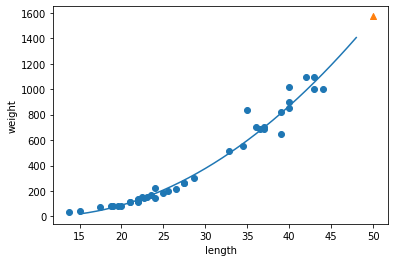

In [ ]:
#훈련 세트의 산점도를 짧은 직선을 이어서 곡선처럼 표현함

#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듦
point = np.arange(15,49)

#훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 + -21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#이제 훈련 세트와 테스트 세트의 R^2(결정계수) 점수를 평가함
print(lr.score(train_ploy, train_target))
print(lr.score(test_ploy,test_target))
#아직 과소적합이 좀 남아있음

0.9706807451768623
0.9775935108325121
